# Sección A Exploración EDA

In [2]:
import pandas as pd

df = pd.read_csv("diabetes_dataset.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   age                                 100000 non-null  int64  
 1   gender                              100000 non-null  object 
 2   ethnicity                           100000 non-null  object 
 3   education_level                     100000 non-null  object 
 4   income_level                        100000 non-null  object 
 5   employment_status                   100000 non-null  object 
 6   smoking_status                      100000 non-null  object 
 7   alcohol_consumption_per_week        100000 non-null  int64  
 8   physical_activity_minutes_per_week  100000 non-null  int64  
 9   diet_score                          100000 non-null  float64
 10  sleep_hours_per_day                 100000 non-null  float64
 11  screen_time_hours_per_day  

In [4]:
df.head()


,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage,diagnosed_diabetes
0,58,Male,Asian,Highschool,Lower-Middle,Employed,Never,0,215,5.7,...,41,160,145,136,236,6.36,8.18,29.6,Type 2,1
1,48,Female,White,Highschool,Middle,Employed,Former,1,143,6.7,...,55,50,30,93,150,2.00,5.63,23.0,No Diabetes,0
2,60,Male,Hispanic,Highschool,Middle,Unemployed,Never,1,57,6.4,...,66,99,36,118,195,5.07,7.51,44.7,Type 2,1
3,74,Female,Black,Highschool,Low,Retired,Never,0,49,3.4,...,50,79,140,139,253,5.28,9.03,38.2,Type 2,1
4,46,Male,White,Graduate,Middle,Retired,Never,1,109,7.2,...,52,125,160,137,184,12.74,7.20,23.5,Type 2,1


In [5]:
df.shape

(100000, 31)

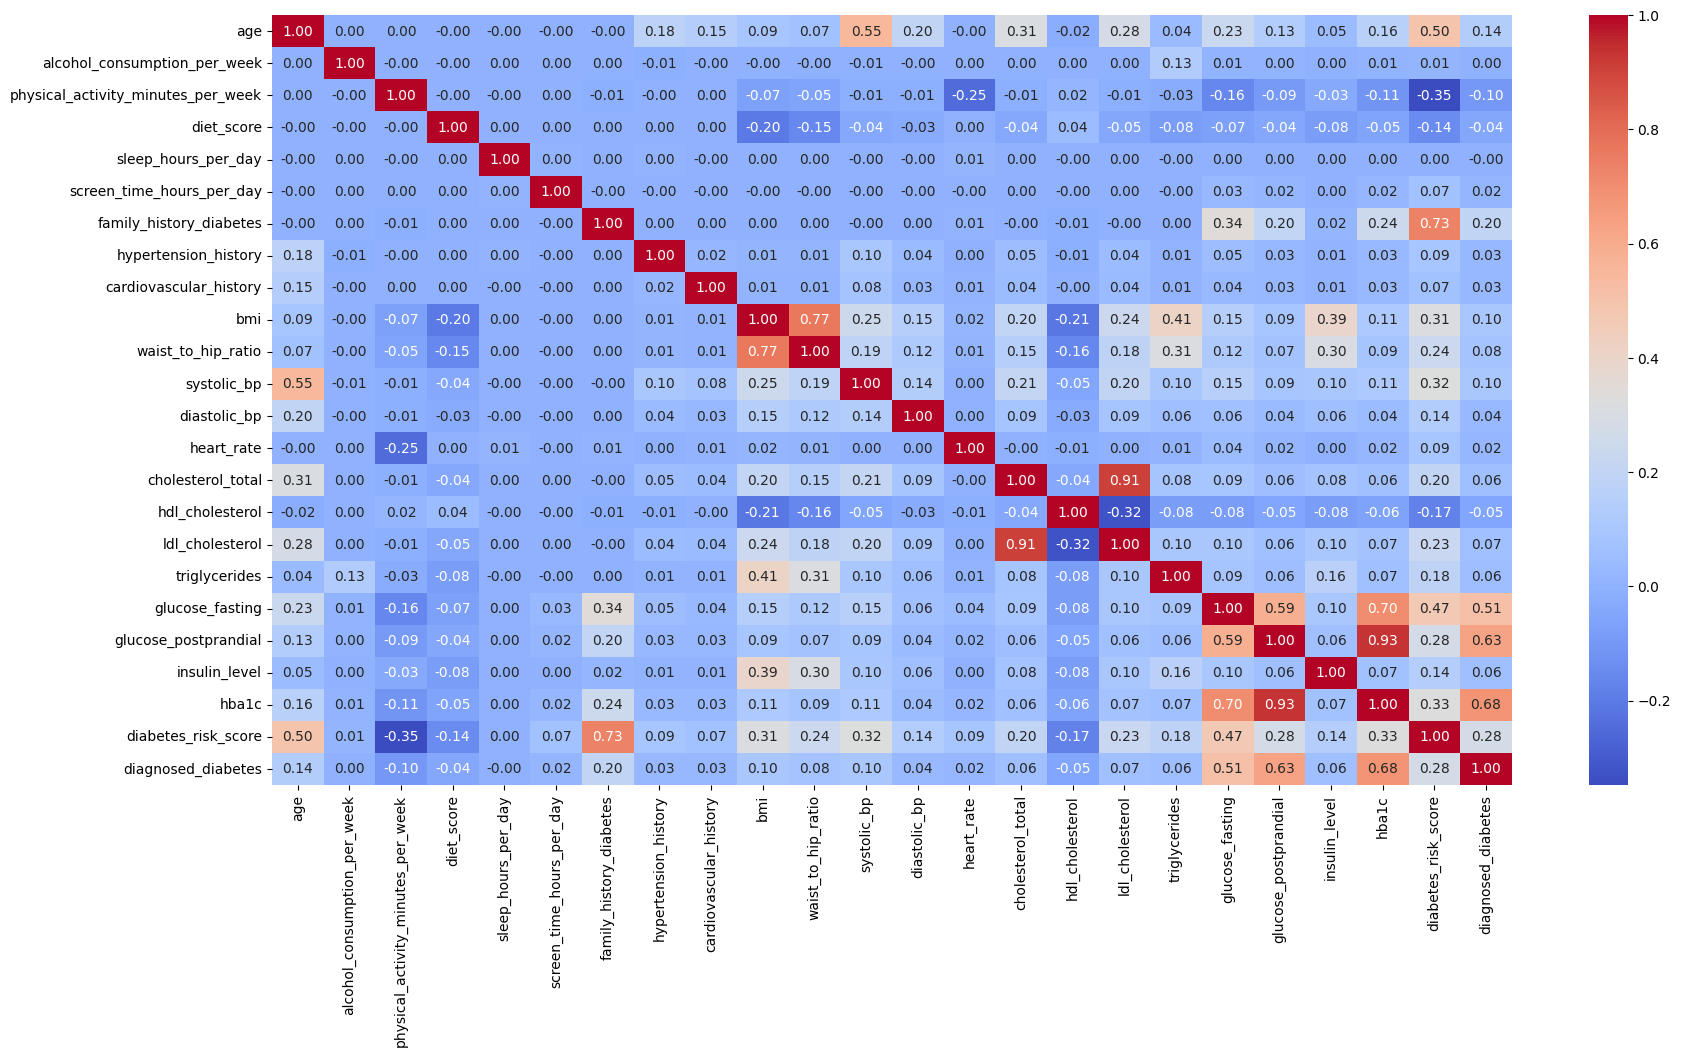

In [6]:
#Matriz de correlación para ver cuál es la variable dependiente y 
#cuáles variables son más relevantes.
import seaborn as sns
import matplotlib.pyplot as plt

colsNum = df.select_dtypes(include="number").columns.tolist()

corr = df[colsNum].corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")

plt.show()

In [7]:
valClaves = ['hba1c', 'glucose_postprandial', 'glucose_fasting']

for col in valClaves:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    print(f"La mayor concentración de los datos de {col} están dentro de {Q1:.2f} y {Q3:.2f}")

La mayor concentración de los datos de hba1c están dentro de 5.97 y 7.07
La mayor concentración de los datos de glucose_postprandial están dentro de 139.00 y 181.00
La mayor concentración de los datos de glucose_fasting están dentro de 102.00 y 120.00


In [8]:
#Datos nulos ordenados de mayor a menor
df.isna().sum().sort_values(ascending=False)

age                                   0
gender                                0
ethnicity                             0
education_level                       0
income_level                          0
employment_status                     0
smoking_status                        0
alcohol_consumption_per_week          0
physical_activity_minutes_per_week    0
diet_score                            0
sleep_hours_per_day                   0
screen_time_hours_per_day             0
family_history_diabetes               0
hypertension_history                  0
cardiovascular_history                0
bmi                                   0
waist_to_hip_ratio                    0
systolic_bp                           0
diastolic_bp                          0
heart_rate                            0
cholesterol_total                     0
hdl_cholesterol                       0
ldl_cholesterol                       0
triglycerides                         0
glucose_fasting                       0


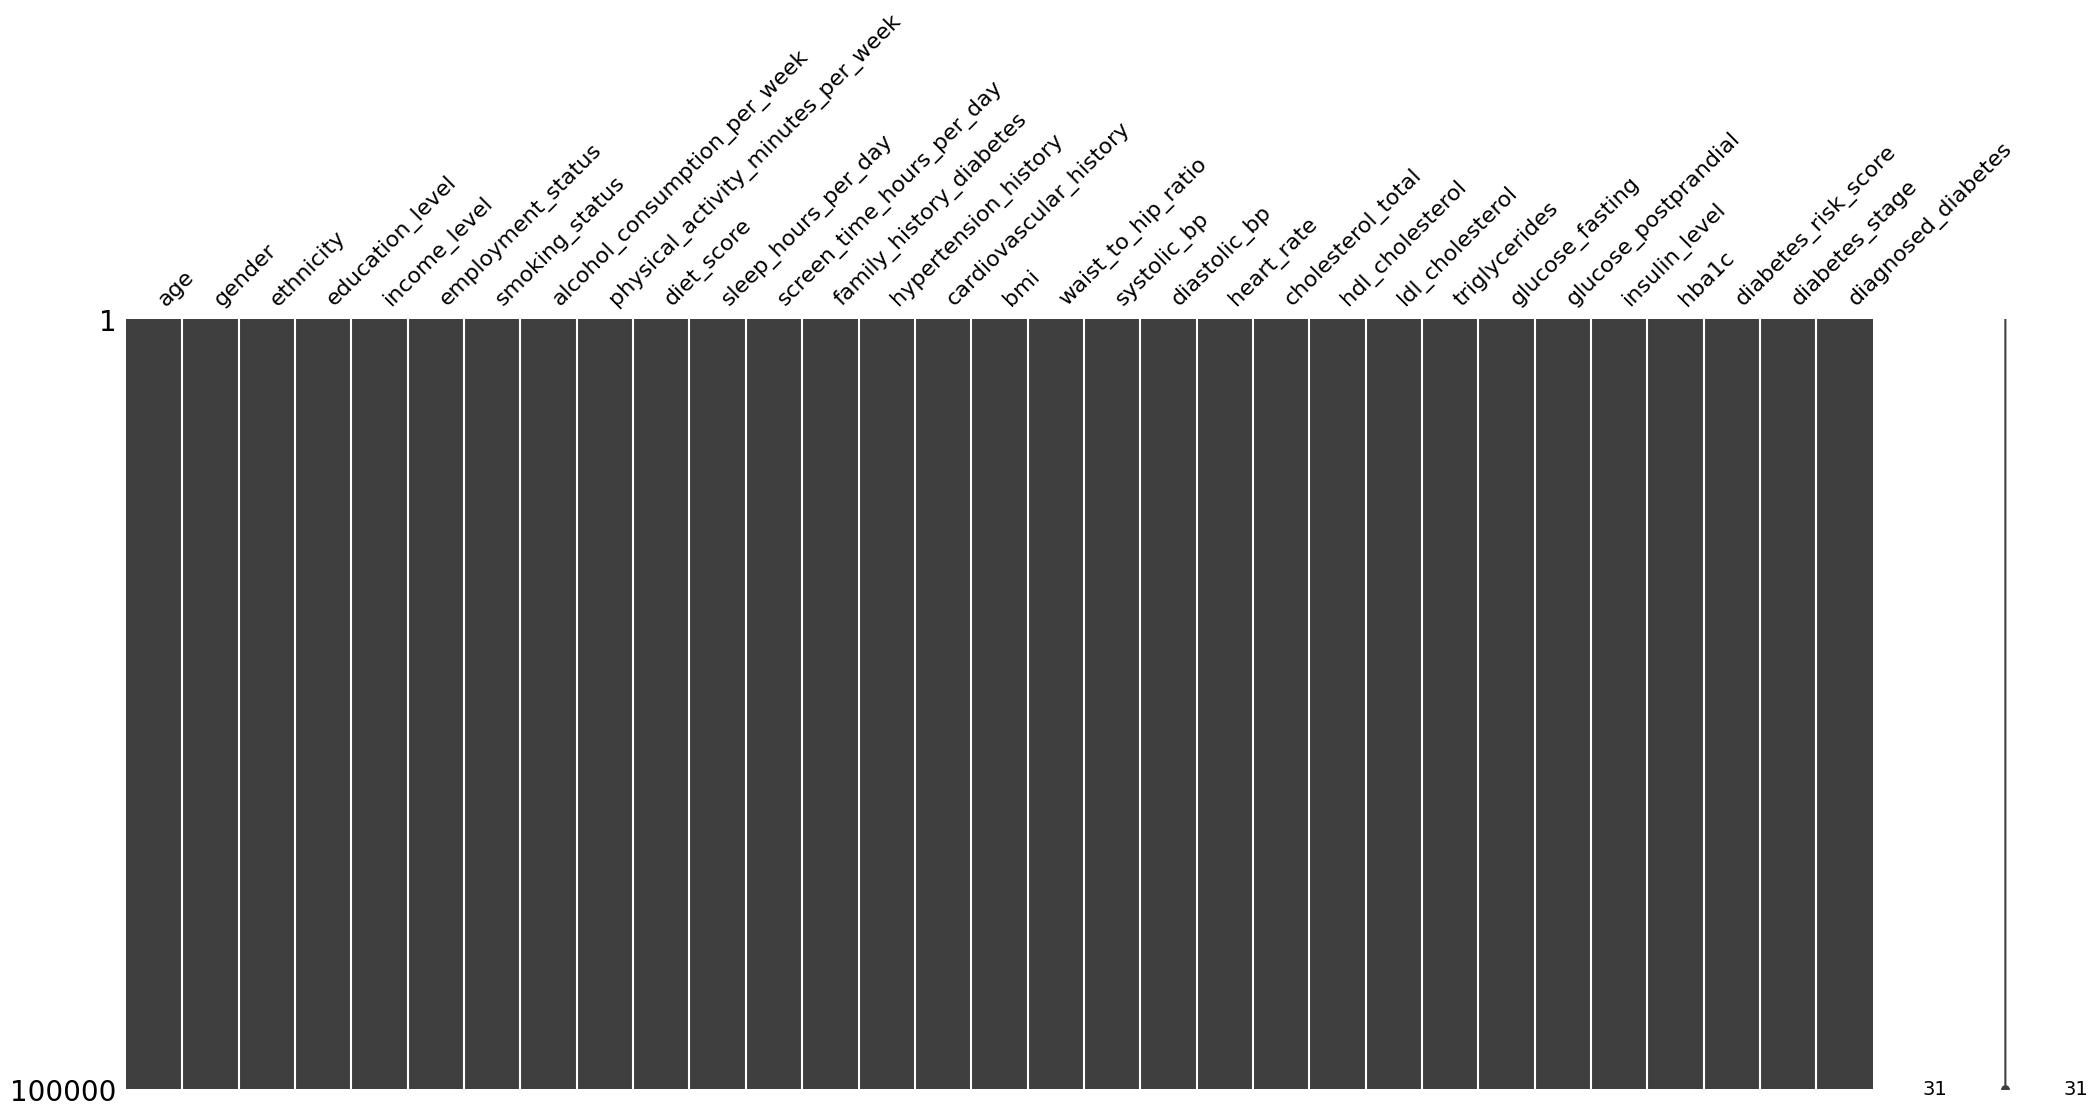

In [9]:
import missingno as msn
import matplotlib.pyplot as plt

msn.matrix(df)
plt.show()

In [10]:
#Veremos algunos valores con "ruido" en las columnas con el mínimo y máximo
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,100000.0,50.120410,15.604600,18.00,39.00,50.00,61.00,90.00
alcohol_consumption_per_week,100000.0,2.003670,1.417779,0.00,1.00,2.00,3.00,10.00
physical_activity_minutes_per_week,100000.0,118.911640,84.409662,0.00,57.00,100.00,160.00,833.00
diet_score,100000.0,5.994787,1.780954,0.00,4.80,6.00,7.20,10.00
sleep_hours_per_day,100000.0,6.997818,1.094622,3.00,6.30,7.00,7.70,10.00
screen_time_hours_per_day,100000.0,5.996468,2.468406,0.50,4.30,6.00,7.70,16.80
family_history_diabetes,100000.0,0.219410,0.413849,0.00,0.00,0.00,0.00,1.00
hypertension_history,100000.0,0.250800,0.433476,0.00,0.00,0.00,1.00,1.00
cardiovascular_history,100000.0,0.079200,0.270052,0.00,0.00,0.00,0.00,1.00
bmi,100000.0,25.612653,3.586705,15.00,23.20,25.60,28.00,39.20


In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
colsNum = df.select_dtypes(include="number").columns.tolist()

for col in colsNum:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    mask = df[(df[col] < lower) | (df[col] > upper)]
    print(f"Cantidad de outliers en {col} : {len(mask)}")

Cantidad de outliers en age : 0
Cantidad de outliers en alcohol_consumption_per_week : 458
Cantidad de outliers en physical_activity_minutes_per_week : 3199
Cantidad de outliers en diet_score : 337
Cantidad de outliers en sleep_hours_per_day : 900
Cantidad de outliers en screen_time_hours_per_day : 305
Cantidad de outliers en family_history_diabetes : 21941
Cantidad de outliers en hypertension_history : 0
Cantidad de outliers en cardiovascular_history : 7920
Cantidad de outliers en bmi : 744
Cantidad de outliers en waist_to_hip_ratio : 273
Cantidad de outliers en systolic_bp : 530
Cantidad de outliers en diastolic_bp : 731
Cantidad de outliers en heart_rate : 855
Cantidad de outliers en cholesterol_total : 309
Cantidad de outliers en hdl_cholesterol : 565
Cantidad de outliers en ldl_cholesterol : 349
Cantidad de outliers en triglycerides : 301
Cantidad de outliers en glucose_fasting : 745
Cantidad de outliers en glucose_postprandial : 634
Cantidad de outliers en insulin_level : 326
Can

In [13]:
numCols = df.select_dtypes(include="number").columns.tolist()

for col in numCols:
    print(f"Asimetría de {col}: {df[col].skew()}")

Asimetría de age: 0.08268602466165732
Asimetría de alcohol_consumption_per_week: 0.7033434878834333
Asimetría de physical_activity_minutes_per_week: 1.3899701983551658
Asimetría de diet_score: -0.07025109543372467
Asimetría de sleep_hours_per_day: -0.012613494106121443
Asimetría de screen_time_hours_per_day: 0.08257264640857293
Asimetría de family_history_diabetes: 1.356029066851414
Asimetría de hypertension_history: 1.1497989235311177
Asimetría de cardiovascular_history: 3.1164990238427084
Asimetría de bmi: 0.006295654533861601
Asimetría de waist_to_hip_ratio: 0.005583868429741822
Asimetría de systolic_bp: 0.2187561691882406
Asimetría de diastolic_bp: 0.00707400236884844
Asimetría de heart_rate: -0.01681070641766614
Asimetría de cholesterol_total: 0.033571836773928
Asimetría de hdl_cholesterol: -0.0026260114396779556
Asimetría de ldl_cholesterol: 0.3199014992145796
Asimetría de triglycerides: 0.10403523983394188
Asimetría de glucose_fasting: 0.046037196958746765
Asimetría de glucose_p

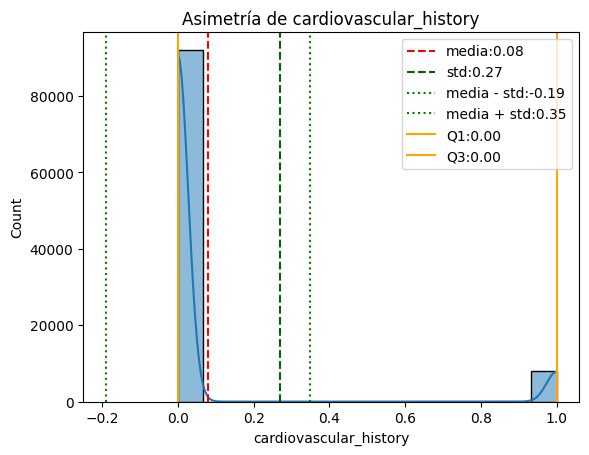

In [14]:
altAsi = 'cardiovascular_history'
medialtAsi = df[altAsi].mean()
stdaltAsi = df[altAsi].std()
IQR = df[altAsi].quantile(0.75) - df[altAsi].quantile(0.25)

sns.histplot(df[altAsi], bins=15, kde=True)
plt.title(f"Asimetría de {altAsi}")
plt.axvline(medialtAsi, linestyle="--", color="red", label=f"media:{medialtAsi:.2f}")
plt.axvline(stdaltAsi, linestyle="--", color="darkgreen", label=f"std:{stdaltAsi:.2f}")
plt.axvline(medialtAsi - stdaltAsi, linestyle=":", color="green", label=f"media - std:{medialtAsi-stdaltAsi:.2f}")
plt.axvline(medialtAsi + stdaltAsi, linestyle=":", color="green", label=f"media + std:{medialtAsi+stdaltAsi:.2f}")
plt.axvline(Q1, color="orange", label=f"Q1:{df[altAsi].quantile(0.25):.2f}")
plt.axvline(Q3, color="orange", label=f"Q3:{df[altAsi].quantile(0.75):.2f}")
plt.legend()
plt.show()

# Sección B Limpieza y preprocesamiento

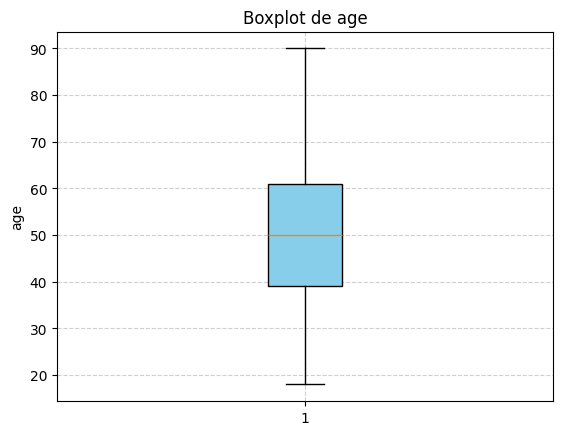

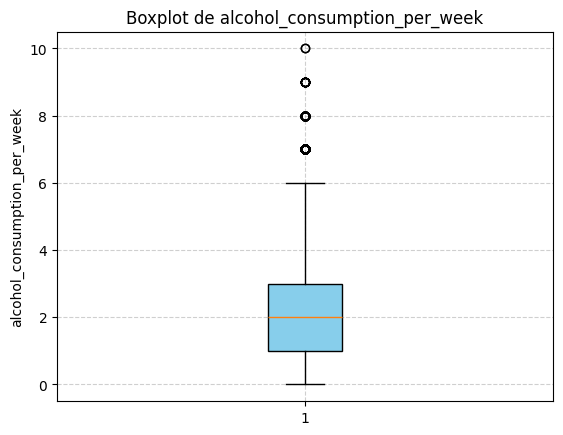

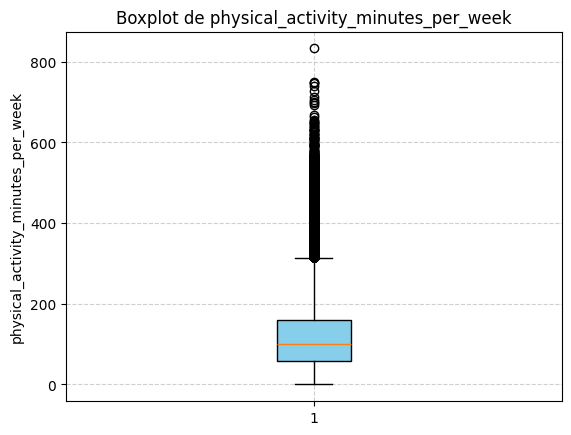

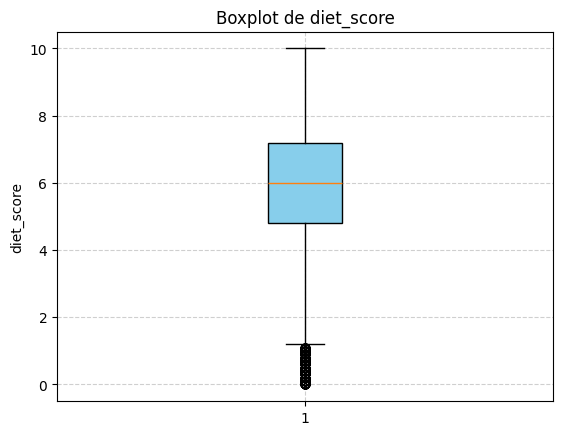

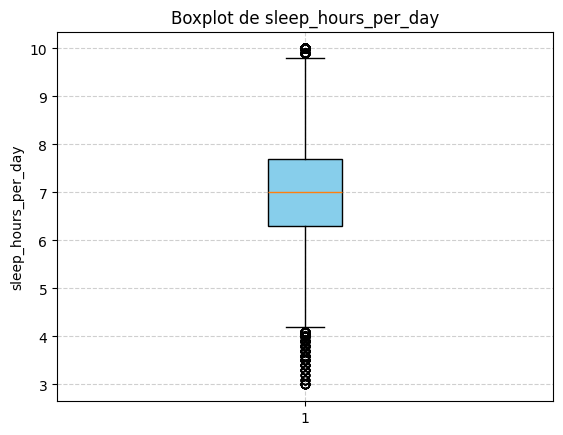

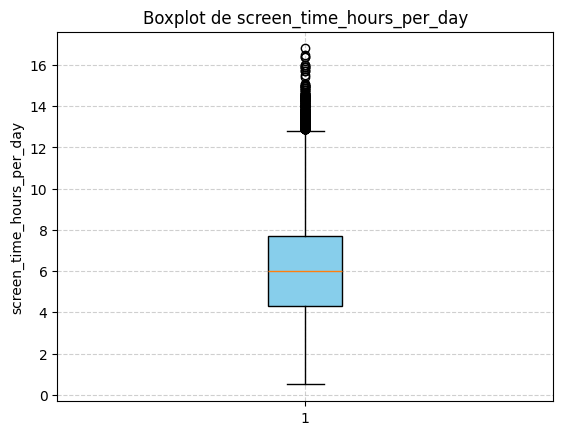

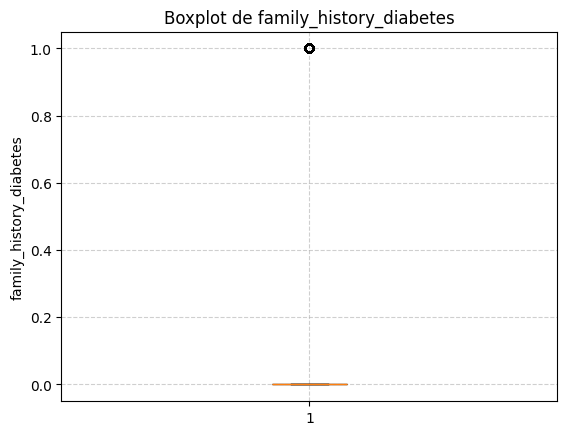

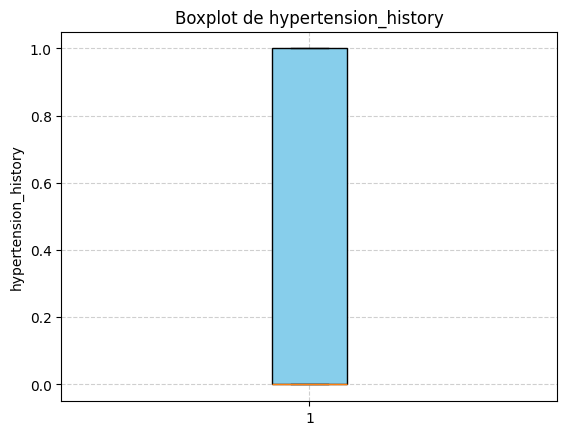

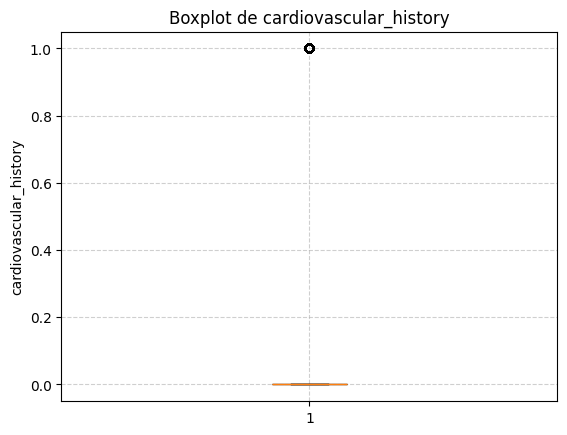

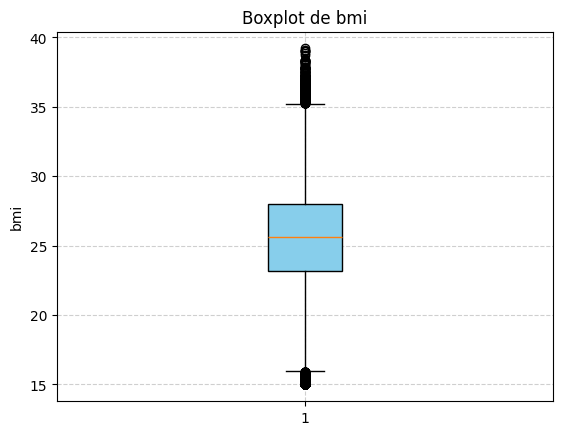

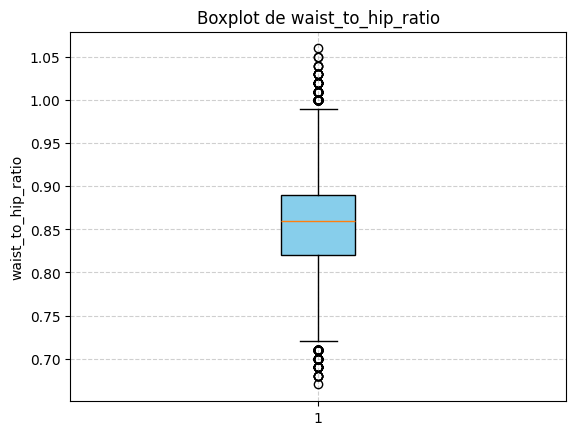

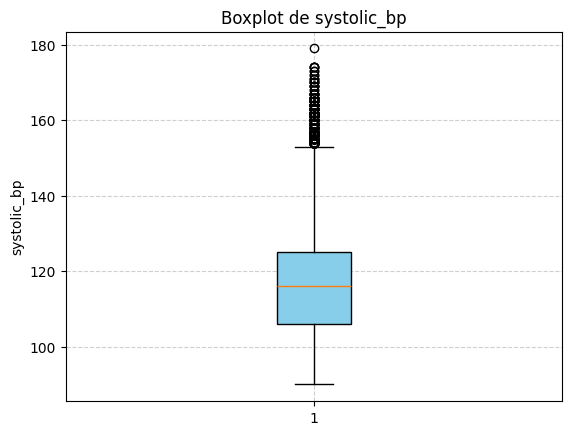

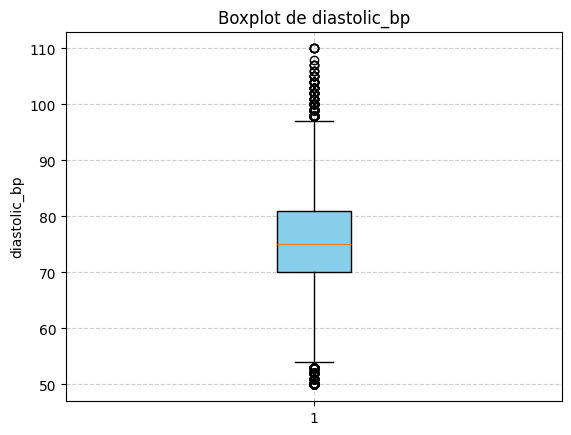

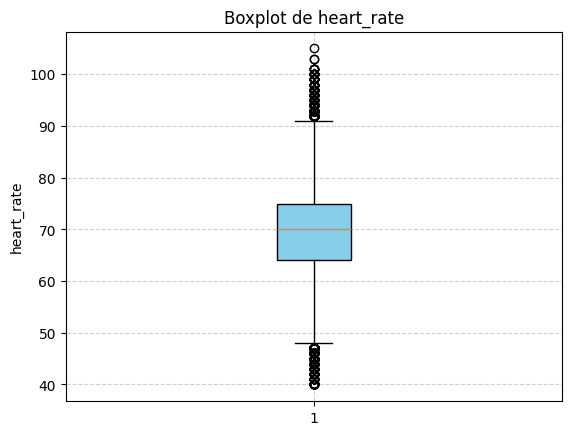

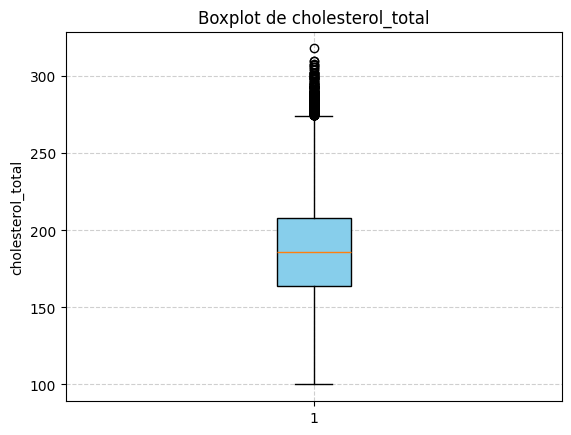

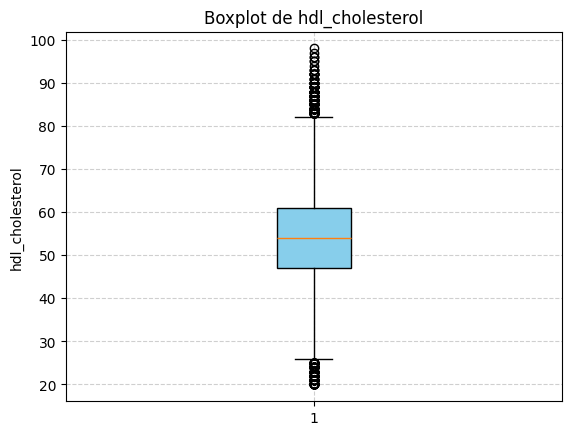

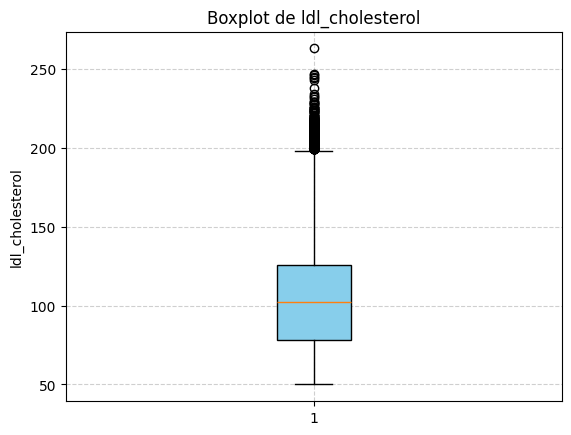

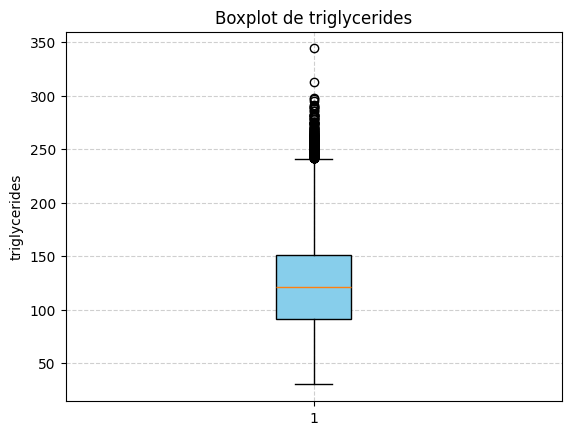

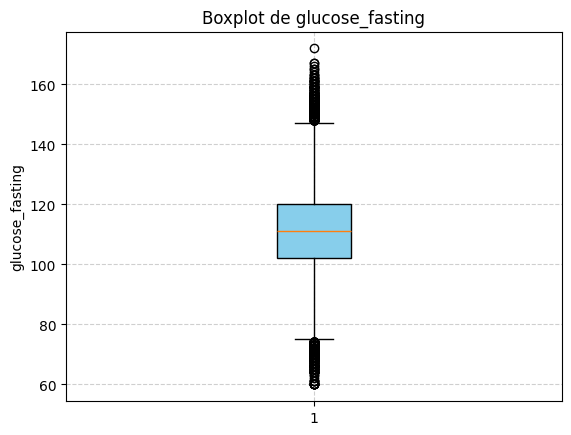

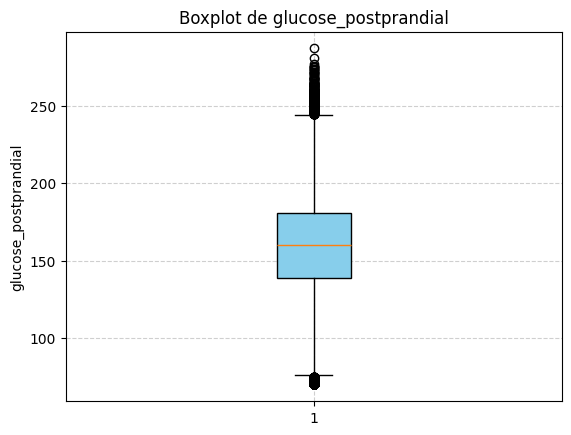

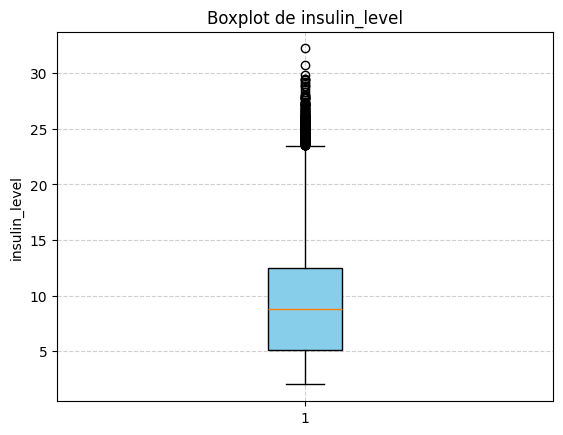

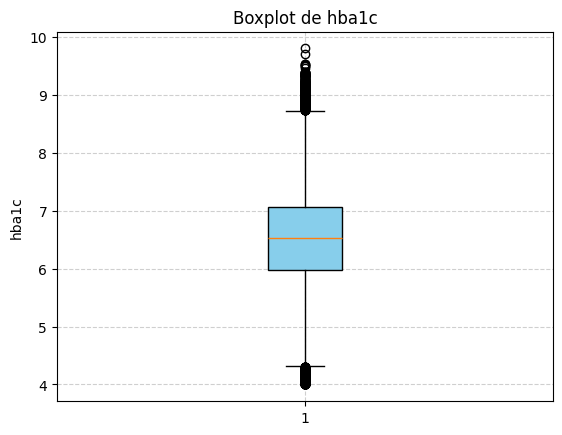

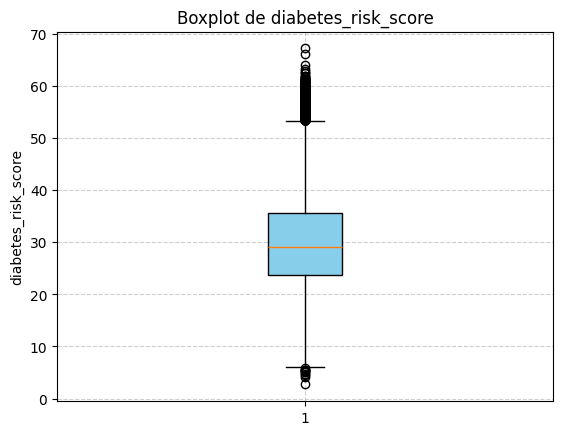

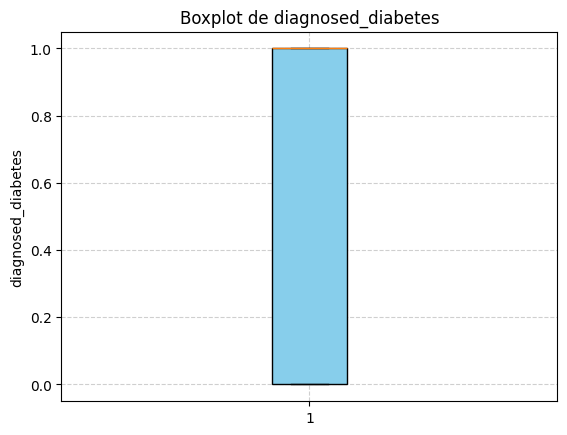

In [15]:
num_cols = df.select_dtypes(include=["number"]).columns.tolist() #selecciona las columna que tengan datos númericos
for col in num_cols:
        #Dibuja un boxplot de la serie, en vertical, rellena el boxplot, y se indica el color de relleno
        plt.boxplot(df[col], vert=True, patch_artist=True, boxprops=dict(facecolor="skyblue"))
        plt.title(f"Boxplot de {col}")
        plt.ylabel(col)
        plt.grid(True, linestyle="--", alpha=0.6) #Es el fondo del gráfico
        plt.show()

In [16]:
import numpy as np
import pandas as pd

def winsorizarOutliers(df: pd.DataFrame, cols=None, k:float=3) -> pd.DataFrame:
    df_cast = df.copy()
    if cols is None:
        cols = df_cast.select_dtypes(include="number").columns.tolist()
    for col in cols:
        q1 = df_cast[col].quantile(0.25)
        q3 = df_cast[col].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - k * iqr
        upper = q3 + k * iqr
        df_cast[col] = np.where(df_cast[col] < lower, lower,
                          np.where(df_cast[col] > upper, upper, df_cast[col]))
    return df_cast


In [17]:
dfCleanOutliers = winsorizarOutliers(df)
dfCleanOutliers

,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage,diagnosed_diabetes
0,58.0,Male,Asian,Highschool,Lower-Middle,Employed,Never,0.0,215.0,5.7,...,41.0,160.0,145.0,136.0,236.0,6.36,8.18,29.6,Type 2,1.0
1,48.0,Female,White,Highschool,Middle,Employed,Former,1.0,143.0,6.7,...,55.0,50.0,30.0,93.0,150.0,2.00,5.63,23.0,No Diabetes,0.0
2,60.0,Male,Hispanic,Highschool,Middle,Unemployed,Never,1.0,57.0,6.4,...,66.0,99.0,36.0,118.0,195.0,5.07,7.51,44.7,Type 2,1.0
3,74.0,Female,Black,Highschool,Low,Retired,Never,0.0,49.0,3.4,...,50.0,79.0,140.0,139.0,253.0,5.28,9.03,38.2,Type 2,1.0
4,46.0,Male,White,Graduate,Middle,Retired,Never,1.0,109.0,7.2,...,52.0,125.0,160.0,137.0,184.0,12.74,7.20,23.5,Type 2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,46.0,Male,Other,Graduate,Upper-Middle,Unemployed,Former,1.0,136.0,8.3,...,45.0,150.0,116.0,113.0,109.0,14.58,5.55,26.0,Pre-Diabetes,0.0
99996,41.0,Female,White,Graduate,Middle,Employed,Never,3.0,76.0,8.8,...,55.0,123.0,146.0,96.0,146.0,9.02,5.97,24.4,Pre-Diabetes,0.0
99997,57.0,Female,Black,No formal,Upper-Middle,Employed,Former,4.0,121.0,9.9,...,50.0,111.0,184.0,93.0,132.0,2.57,5.21,27.6,No Diabetes,0.0
99998,47.0,Female,Black,Highschool,Lower-Middle,Retired,Never,3.0,52.0,5.9,...,68.0,91.0,116.0,106.0,117.0,9.81,5.53,26.4,Pre-Diabetes,0.0


In [18]:
colsNum = dfCleanOutliers.select_dtypes(include="number").columns.tolist()
for col in colsNum:
    Q1 = dfCleanOutliers[col].quantile(0.25)
    Q3 = dfCleanOutliers[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    mask = dfCleanOutliers[(dfCleanOutliers[col] < lower) | (dfCleanOutliers[col] > upper)]
    print(f"Cantidad de outliers en {col} : {len(mask)}")

Cantidad de outliers en age : 0
Cantidad de outliers en alcohol_consumption_per_week : 458
Cantidad de outliers en physical_activity_minutes_per_week : 3199
Cantidad de outliers en diet_score : 337
Cantidad de outliers en sleep_hours_per_day : 900
Cantidad de outliers en screen_time_hours_per_day : 305
Cantidad de outliers en family_history_diabetes : 0
Cantidad de outliers en hypertension_history : 0
Cantidad de outliers en cardiovascular_history : 0
Cantidad de outliers en bmi : 744
Cantidad de outliers en waist_to_hip_ratio : 273
Cantidad de outliers en systolic_bp : 530
Cantidad de outliers en diastolic_bp : 731
Cantidad de outliers en heart_rate : 855
Cantidad de outliers en cholesterol_total : 309
Cantidad de outliers en hdl_cholesterol : 565
Cantidad de outliers en ldl_cholesterol : 349
Cantidad de outliers en triglycerides : 301
Cantidad de outliers en glucose_fasting : 745
Cantidad de outliers en glucose_postprandial : 634
Cantidad de outliers en insulin_level : 326
Cantidad d

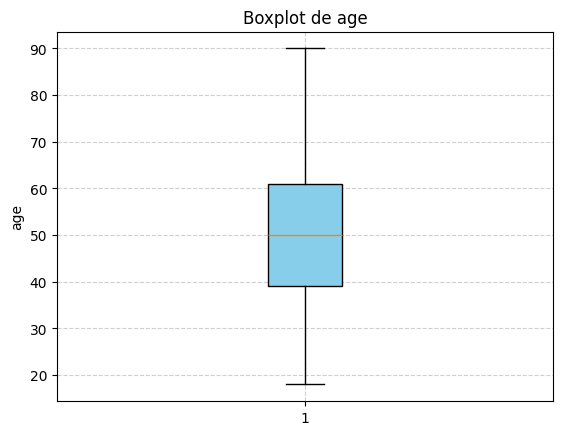

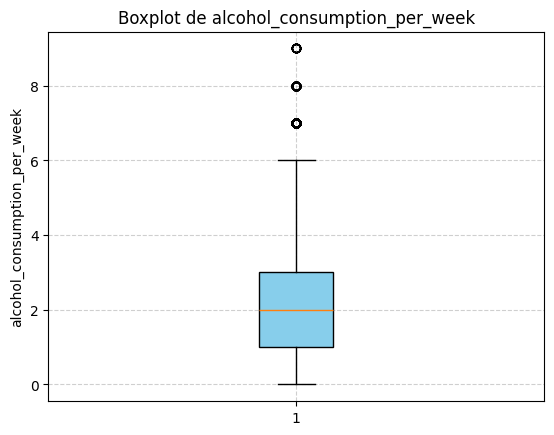

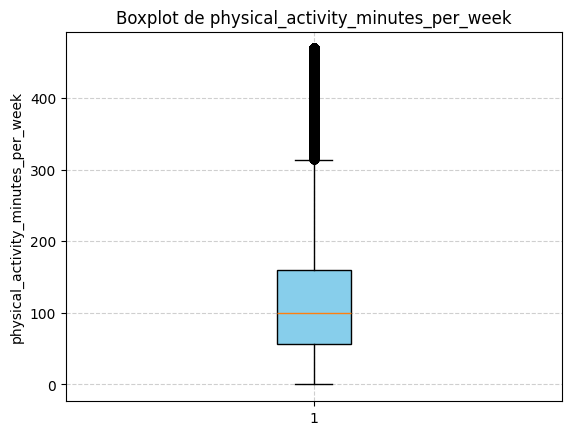

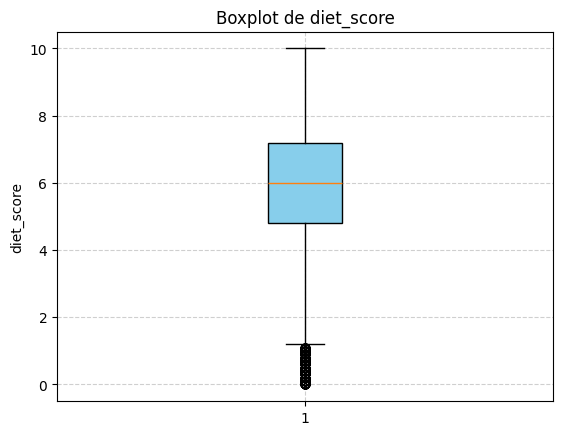

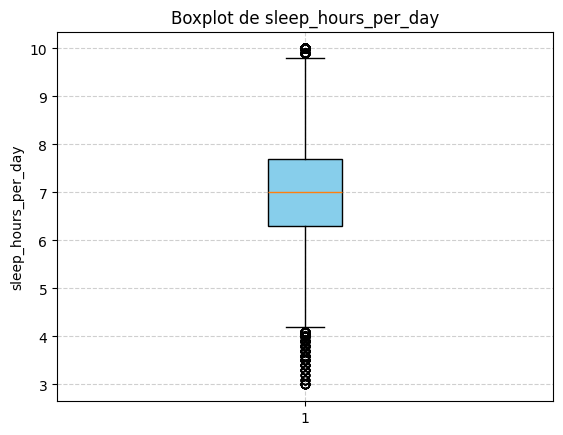

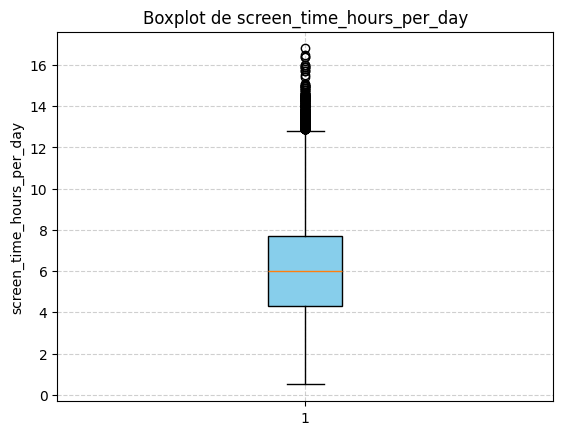

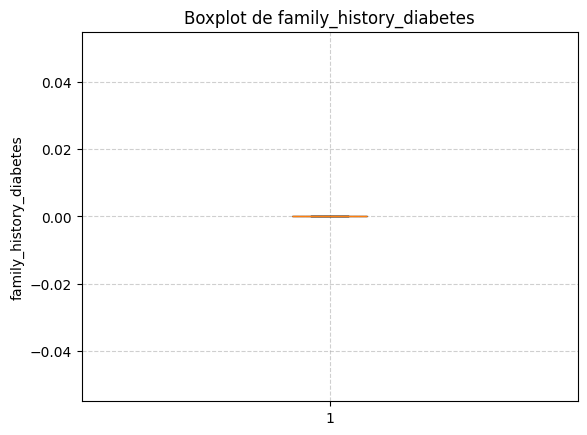

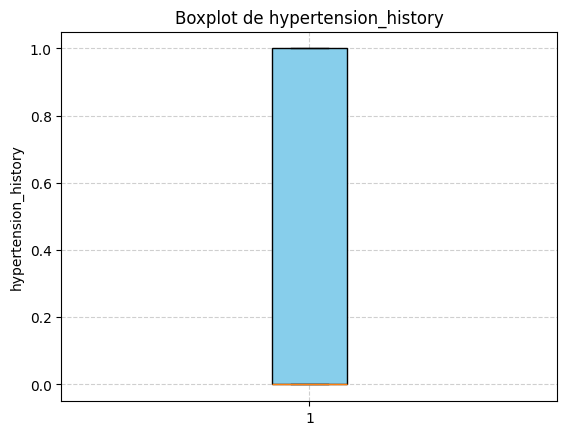

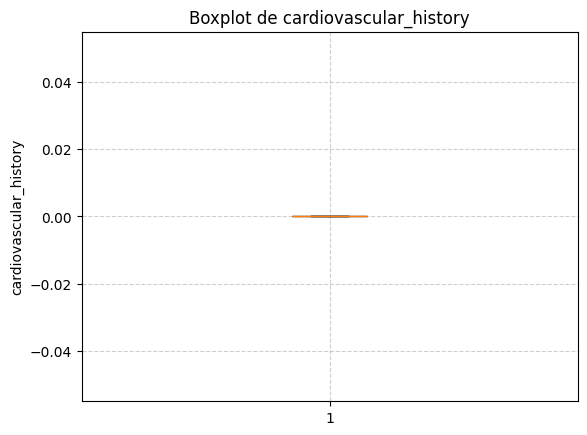

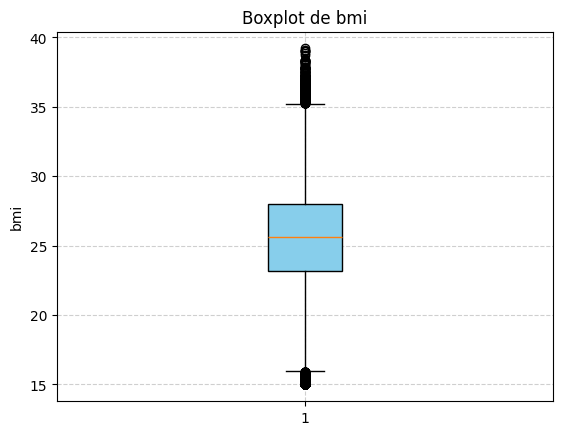

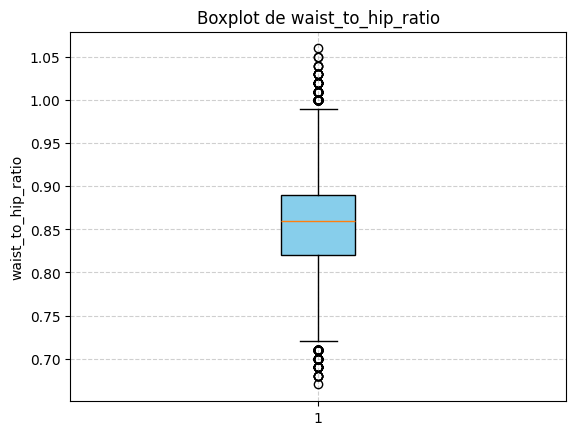

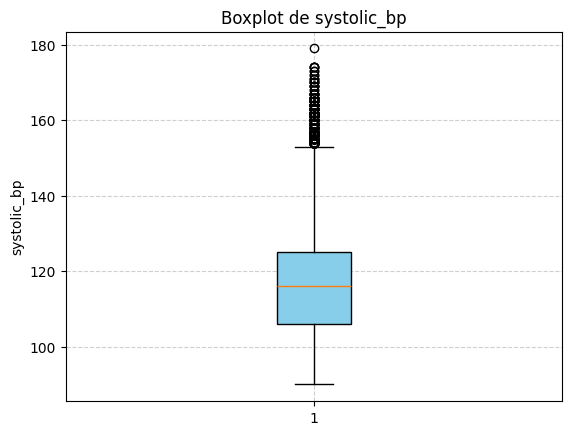

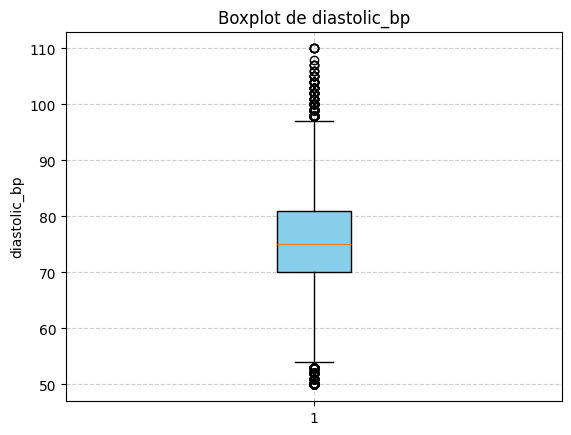

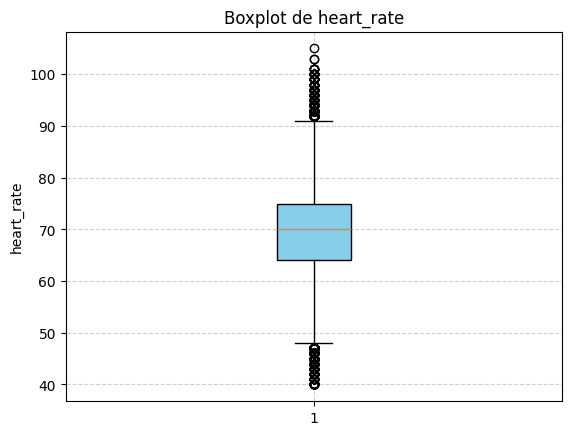

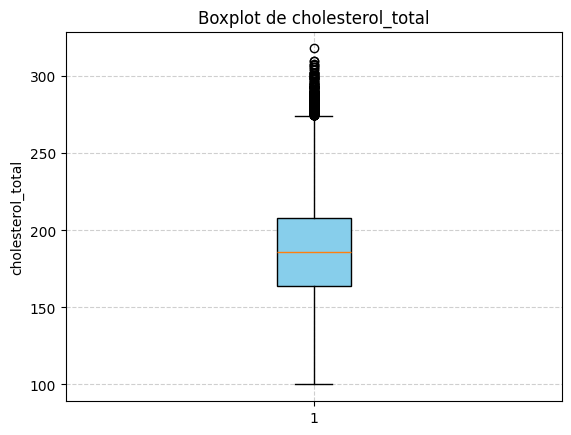

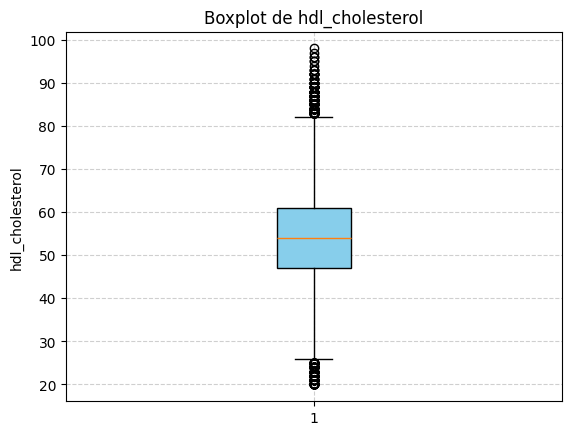

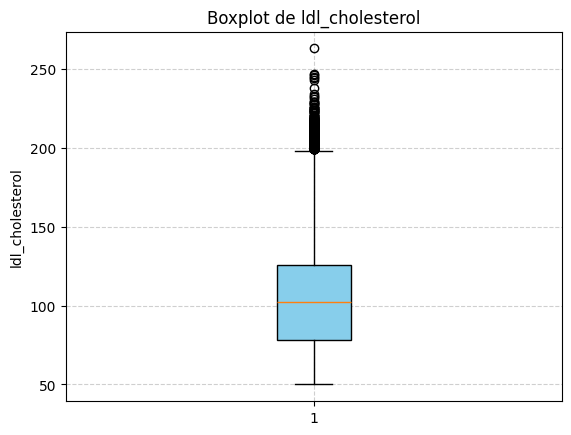

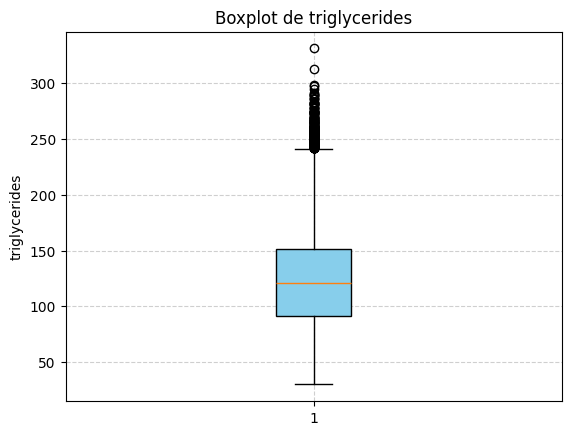

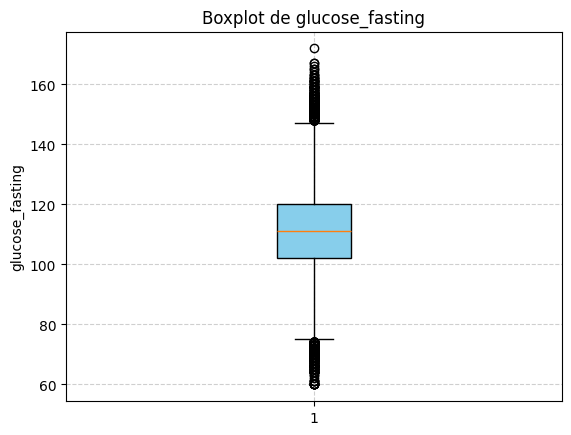

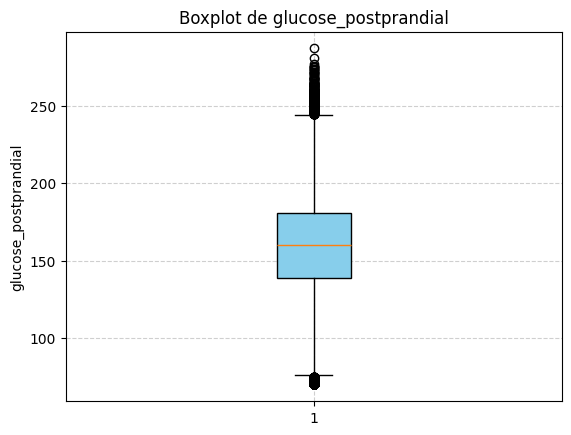

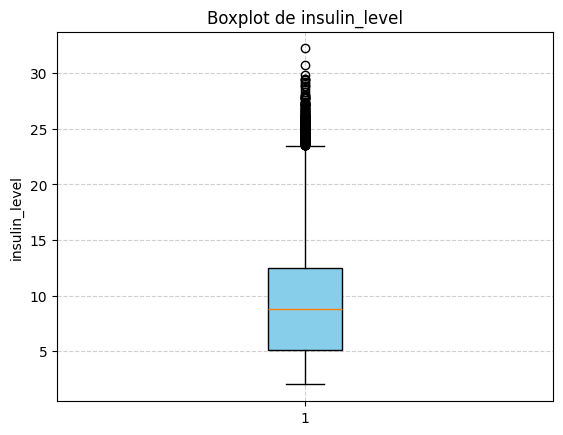

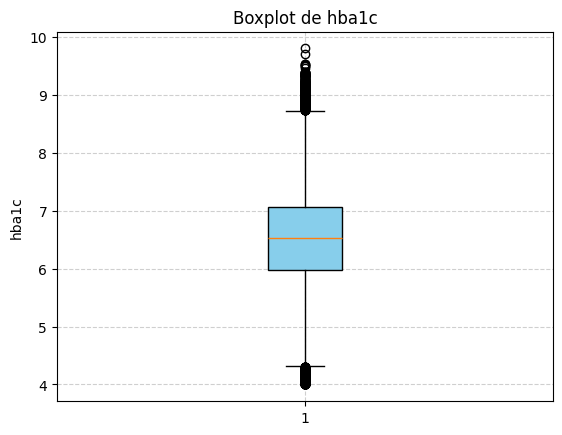

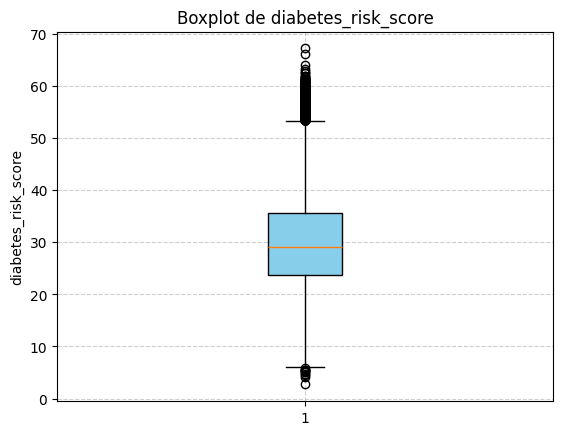

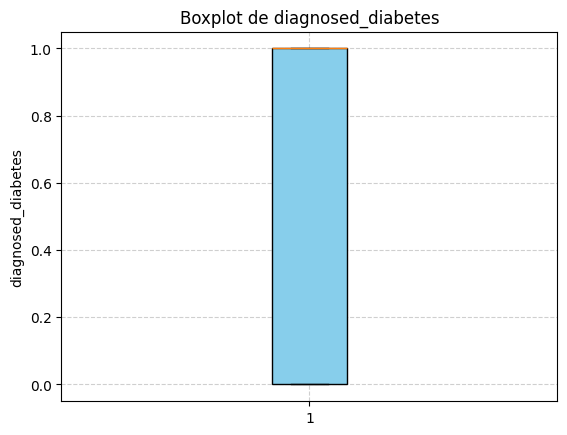

In [19]:
num_cols = dfCleanOutliers.select_dtypes(include=["number"]).columns.tolist() #selecciona las columna que tengan datos númericos
for col in num_cols:
        plt.boxplot(dfCleanOutliers[col], vert=True, patch_artist=True, boxprops=dict(facecolor="skyblue"))
        plt.title(f"Boxplot de {col}")
        plt.ylabel(col)
        plt.grid(True, linestyle="--", alpha=0.6) #Es el fondo del gráfico
        plt.show()

In [20]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd 

colsOHE = ['gender', 'ethnicity', 'employment_status', 'smoking_status']
colsORD = ['education_level', 'income_level', 'diabetes_stage']

encoderOHE = OneHotEncoder(drop='first', sparse_output=False)
encoderORD = OrdinalEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', encoderOHE, colsOHE),
        ('ordinal', encoderORD, colsORD)
    ], 
    remainder='passthrough'
)

df_encoded = preprocessor.fit_transform(dfCleanOutliers)

namesOHE = preprocessor.named_transformers_['onehot'].get_feature_names_out(colsOHE)

encoded_cols = list(namesOHE) + colsORD + [
    col for col in dfCleanOutliers.columns if col not in colsOHE + colsORD
]

df_encoded = pd.DataFrame(df_encoded, columns=encoded_cols)


In [22]:
df_encoded.head().T

,0,1,2,3,4
gender_Male,1.00,0.00,1.00,0.00,1.00
gender_Other,0.00,0.00,0.00,0.00,0.00
ethnicity_Black,0.00,0.00,0.00,1.00,0.00
ethnicity_Hispanic,0.00,0.00,1.00,0.00,0.00
ethnicity_Other,0.00,0.00,0.00,0.00,0.00
ethnicity_White,0.00,1.00,0.00,0.00,1.00
employment_status_Retired,0.00,0.00,0.00,1.00,1.00
employment_status_Student,0.00,0.00,0.00,0.00,0.00
employment_status_Unemployed,0.00,0.00,1.00,0.00,0.00
smoking_status_Former,0.00,1.00,0.00,0.00,0.00


Cantidad por clases: diagnosed_diabetes
1.0    59998
0.0    40002
Name: count, dtype: int64
Ratio de desbalance: 1.4998750062496875
